In [48]:
import pandas as pd
import matplotlib as plt

'''* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type
'''

'* Average Fare ($) Per City\n* Total Number of Rides Per City\n* Total Number of Drivers Per City\n* City Type (Urban, Suburban, Rural)\n\nIn addition, you will be expected to produce the following three pie charts:\n\n* % of Total Fares by City Type\n* % of Total Rides by City Type\n* % of Total Drivers by City Type\n'

In [49]:
file_location = "../../Resources/Pyber/ride_data.csv"
ride_data = pd.read_csv(file_location)

file_location2 = "../../Resources/Pyber/city_data.csv"
city_data = pd.read_csv(file_location2)
ride_data.head()
#ride_data["city"].nunique()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [50]:
city_data.head()
#city_data["city"].count_values

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [60]:
#We need to group the ride data by city
#it should read city - average fare... that's it?
#merge the two lists
#rock on
try:
    ride_data = ride_data.groupby("city")
except AttributeError:
    print("Already grouped")
ride_series = ride_data["fare"].mean()
ride_count = ride_data["ride_id"].count()
#I think we need the data to be a df to merge it, so let's convert:
ride_df = ride_series.to_frame()
ride_df2 = ride_count.to_frame()
ride_df=ride_df.reset_index()
ride_df2 = ride_df2.reset_index()
ride_df = pd.merge(ride_df, ride_df2, on="city", how="left")
ride_df.head()

Already grouped


,city,fare,ride_id
0,Alvarezhaven,23.928710,31
1,Alyssaberg,20.609615,26
2,Anitamouth,37.315556,9
3,Antoniomouth,23.625000,22
4,Aprilchester,21.981579,19


In [61]:
merge_ride_df = pd.merge(city_data, ride_df, on="city", how="left")
merge_ride_df.head()

,city,driver_count,type,fare,ride_id
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


In [62]:
merge_ride_df = merge_ride_df.rename(columns = {"city": "City", "ride_id":"Ride Count","driver_count": "Driver Count", "type": "City Type", "fare": "Average Fare"})
merge_ride_df.head()

,City,Driver Count,City Type,Average Fare,Ride Count
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


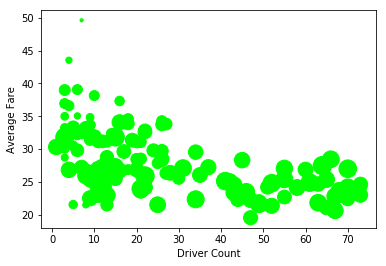

In [77]:
x_axis = merge_ride_df["Driver Count"]
y_axis = merge_ride_df["Average Fare"]
bub_size = merge_ride_df["Ride Count"]
bub_color = merge_ride_df["City Type"]
colors = ["gold", "light sky blue", "light coral"]
#what about splitting the data into 3, doing a different chart for each city type in a different color, then pulling them together?

Urban = 1
Suburban = 2
Rural = 3

merge_ride_df.plot.scatter(x="Driver Count", y="Average Fare", c=bub_color, s=bub_size*10)
#merge_ride_df.plot.scatter(x=x_axis, y=y_axis, s=bub_size)